# Setup

In [2]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 # set the fonttype of all pdf to 42
plt.rcParams['ps.fonttype'] = 42   # set the PostScript plots 

# # show figures in the notebook
%matplotlib inline 

sc.settings.set_figure_params(dpi=200) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow
sc.set_figure_params(frameon=False)

In [3]:
adata = sc.read_h5ad("data/TabulaSapiens.h5ad")
adata

AnnData object with n_obs × n_vars = 483152 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'compartment_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

---
## adata.obs

In [4]:
# df of observation metadata for each sample in the AnnData obj
adata.obs

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,male
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,male
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,male
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,male
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,male
...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,smartseq2,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,smartseq2,TSP2,aorta,9565.0,529,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,smartseq2,TSP2,aorta,195639.0,2753,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,smartseq2,TSP2,aorta,37260.0,984,endothelial cell,endothelial cell,True,endothelial,female


In [5]:
adata.obs.columns

Index(['organ_tissue', 'method', 'donor', 'anatomical_information',
       'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation',
       'manually_annotated', 'compartment', 'gender'],
      dtype='object')

In [6]:
# unique organ_tissue
set(adata.obs['organ_tissue'])

{'Bladder',
 'Blood',
 'Bone_Marrow',
 'Eye',
 'Fat',
 'Heart',
 'Kidney',
 'Large_Intestine',
 'Liver',
 'Lung',
 'Lymph_Node',
 'Mammary',
 'Muscle',
 'Pancreas',
 'Prostate',
 'Salivary_Gland',
 'Skin',
 'Small_Intestine',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea',
 'Uterus',
 'Vasculature'}

In [7]:
# unique methods
set(adata.obs['method'])

{'10X', 'smartseq2'}

: 

In [6]:
# unique donors
set(adata.obs['donor'])

{'TSP1',
 'TSP10',
 'TSP11',
 'TSP12',
 'TSP13',
 'TSP14',
 'TSP15',
 'TSP2',
 'TSP3',
 'TSP4',
 'TSP5',
 'TSP6',
 'TSP7',
 'TSP8',
 'TSP9'}

In [7]:
# unique anatomical_infor. 
set(adata.obs['anatomical_information'])

{'Abdomen',
 'Anterior',
 'Aorta',
 'AortaVeneCava',
 'Atria',
 'Chest',
 'Conjunctiva',
 'Cornea-etc',
 'CoronaryArteries',
 'Diaphragm',
 'Distal',
 'Endocrine',
 'Endometrium',
 'Exocrine',
 'Inguinal',
 'MAT',
 'MedialDistal ',
 'Myometrium',
 'Neuron',
 'Neuroretina-etc',
 'Orbital',
 'Parotid',
 'Posterior',
 'Proximal',
 'SCAT',
 'Sclera-etc',
 'Sublingual',
 'Supradiaphagmatic',
 'Ventricle',
 'abdomen',
 'anterior',
 'aorta',
 'atria',
 'chest',
 'diaphragm',
 'distal',
 'exocrine',
 'inguinal',
 'lacrimalgland',
 'nan',
 'noCornea',
 'posterior',
 'proximal',
 'proxmedialdistal',
 'rectusabdominus',
 'supradiaphragmatic',
 'ventricle',
 'vertebralbody',
 'whole'}

In [8]:
# unique cell_ontology_class
set(adata.obs['cell_ontology_class'])

{'acinar cell of salivary gland',
 'adipocyte',
 'adventitial cell',
 'alveolar fibroblast',
 'artery endothelial cell',
 'b cell',
 'basal cell',
 'basal cell of prostate epithelium',
 'basophil',
 'bladder urothelial cell',
 'bronchial smooth muscle cell',
 'bronchial vessel endothelial cell',
 'capillary aerocyte',
 'capillary endothelial cell',
 'cardiac endothelial cell',
 'cardiac muscle cell',
 'cd141-positive myeloid dendritic cell',
 'cd1c-positive myeloid dendritic cell',
 'cd24 neutrophil',
 'cd4-positive alpha-beta t cell',
 'cd4-positive helper t cell',
 'cd4-positive, alpha-beta memory t cell',
 'cd4-positive, alpha-beta t cell',
 'cd8-positive alpha-beta t cell',
 'cd8-positive, alpha-beta cytokine secreting effector t cell',
 'cd8-positive, alpha-beta cytotoxic t cell',
 'cd8-positive, alpha-beta memory t cell',
 'cd8-positive, alpha-beta t cell',
 'cd8b-positive nk t cell',
 'cell of skeletal muscle',
 'ciliary body',
 'ciliated cell',
 'ciliated epithelial cell',
 'cl

In [ ]:
# loc. specific CO and compartment
adata.obs.loc[adata.obs["cell_ontology_class"]=="hillock-club cell of prostate epithelium","compartment"] 

In [9]:
# loc. specific CO and compartment's value
set( adata.obs.loc[adata.obs["cell_ontology_class"]=="hillock-club cell of prostate epithelium","compartment"].values )

{'epithelial'}

In [10]:
# updates the value
adata.obs.loc[adata.obs["cell_ontology_class"]=="hillock-club cell of prostate epithelium","compartment"] = "epithelial"

In [11]:
# check value
set( adata.obs.loc[adata.obs["cell_ontology_class"]=="hillock-club cell of prostate epithelium","compartment"].values )

{'epithelial'}

In [15]:
# unique gender
set(adata.obs['gender'])

{'female', 'male'}

---
## adata.uns

In [16]:
adata.uns

{'_scvi': {'categorical_mappings': {'_scvi_batch': {'mapping': array(['TSP1smartseq2', 'TSP2smartseq2', 'TSP3smartseq2', 'TSP4smartseq2',
           'TSP5smartseq2', 'TSP6smartseq2', 'TSP7smartseq2', 'TSP8smartseq2',
           'TSP9smartseq2', 'TSP10smartseq2', 'TSP11smartseq2',
           'TSP12smartseq2', 'TSP13smartseq2', 'TSP110X', 'TSP210X',
           'TSP310X', 'TSP410X', 'TSP510X', 'TSP610X', 'TSP710X', 'TSP810X',
           'TSP910X', 'TSP1010X', 'TSP1110X', 'TSP1210X', 'TSP1410X',
           'TSP1510X'], dtype=object),
    'original_key': 'donor_method'},
   '_scvi_labels': {'mapping': array([0]), 'original_key': '_scvi_labels'}},
  'data_registry': {'X': {'attr_key': 'decontXcounts', 'attr_name': 'layers'},
   'batch_indices': {'attr_key': '_scvi_batch', 'attr_name': 'obs'},
   'labels': {'attr_key': '_scvi_labels', 'attr_name': 'obs'},
   'local_l_mean': {'attr_key': '_scvi_local_l_mean', 'attr_name': 'obs'},
   'local_l_var': {'attr_key': '_scvi_local_l_var', 'attr_name':

In [17]:
type(adata.uns)

dict

In [18]:
adata.uns['donor_colors']

array(['#f5fbc4', '#eaf7b1', '#d6efb3', '#bde5b5', '#97d6b9', '#73c8bd',
       '#52bcc2', '#37acc3', '#2498c1', '#1f80b8', '#2165ab', '#234da0',
       '#253795', '#172978', '#081d58'], dtype=object)

In [19]:
adata.uns['method_colors']

array(['#90ee90', '#006400'], dtype=object)

In [20]:
adata.uns['tissue_colors']

array(['#e7969c', '#d6616b', '#cedb9c', '#c7ea46', '#e7cb94', '#ff0800',
       '#7b4173', '#31a354', '#000080', '#3182bd', '#8c6d31', '#ce6dbd',
       '#e7ba52', '#fd8d3c', '#637939', '#622a0f', '#de9ed6', '#6baed6',
       '#393b79', '#9c9ede', '#b5cf6b', '#969696', '#c64b8c', '#843c39'],
      dtype=object)

In [21]:
adata.uns['sex_colors']

array(['#f4cae4', '#cbd5e8'], dtype=object)

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


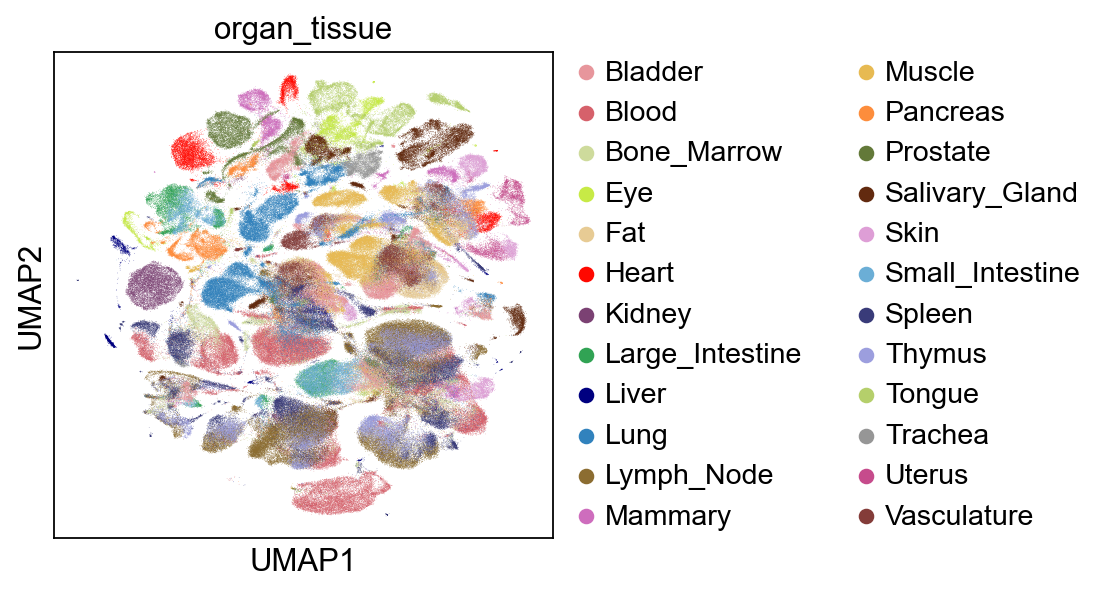

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


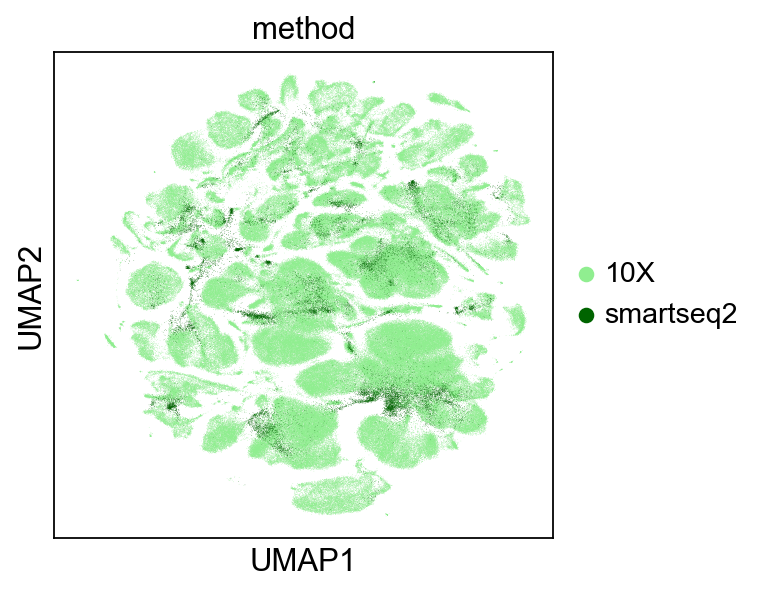

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


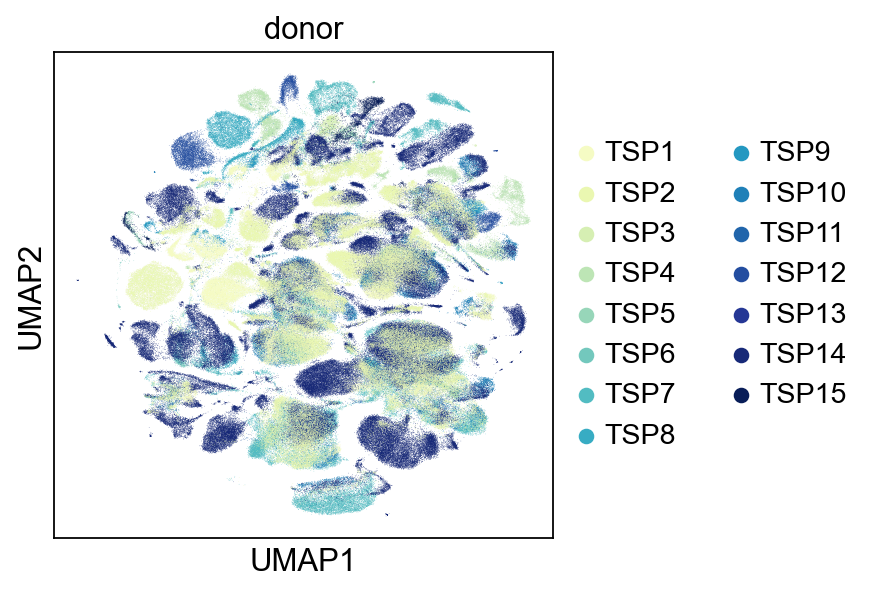

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


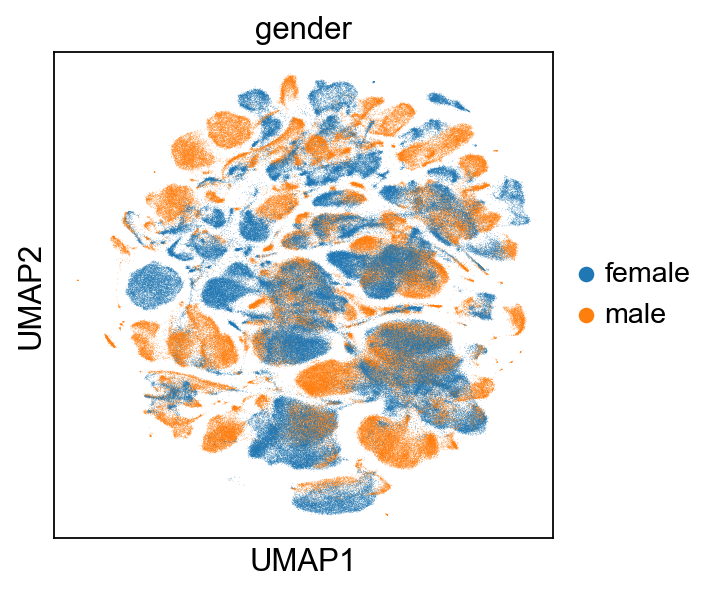

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


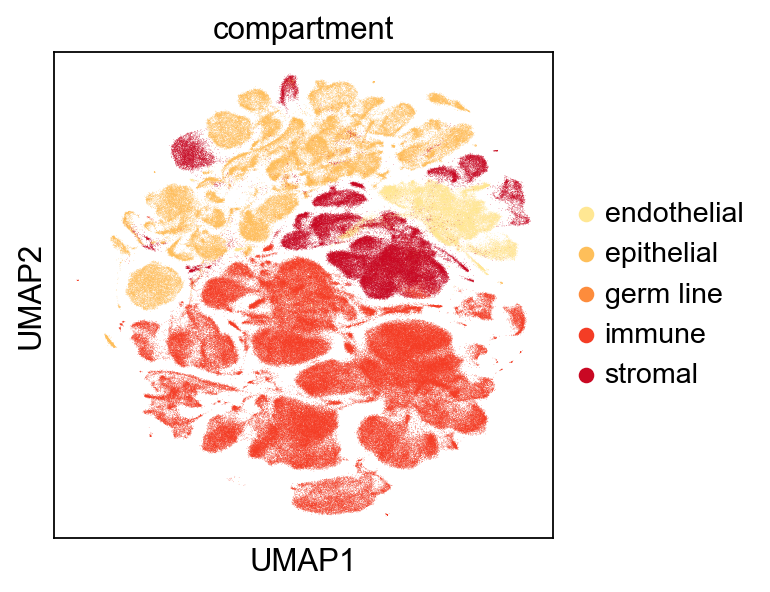

In [24]:
# plot umap for each feature in the colorbylist
colorbylist = ['organ_tissue','method','donor','gender','compartment']
for c in colorbylist:
    sc.pl.umap(adata,
           color=c,
               frameon = True,  # add frame around the plot
           save = "_global_"+c+".pdf"   # save the output w/ the coreesponding feature name
          )

- set() function
applies to the list of compartment annotation to generate a SET of unique values

In [25]:
adata.obs.columns

Index(['organ_tissue', 'method', 'donor', 'anatomical_information',
       'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation',
       'manually_annotated', 'compartment', 'gender'],
      dtype='object')

In [26]:
# set the unique compartment
set(adata.obs["compartment"])

{'endothelial', 'epithelial', 'germ line', 'immune', 'stromal'}

- .isna()
filer all cells that have NaN (missing) values

In [27]:
# id the type of cells for which compratment annotations are missing
set(adata[adata.obs["compartment"].isna()].obs["cell_ontology_class"])

set()

In [5]:
# look at two col. in adata.obs
adata.obs[['compartment', 'cell_ontology_class']]

,compartment,cell_ontology_class
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,immune,macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,immune,monocyte
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial,endothelial cell of hepatic sinusoid
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,immune,macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,immune,liver dendritic cell
...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,endothelial,endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,endothelial,endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,endothelial,endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,endothelial,endothelial cell
